# 变换示例说明

本示例展示了 {mod}`torchvision.transforms.v2` 中可用的各种变换。


In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2

plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

# If you're trying to run that on Colab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
from helpers import plot
# orig_img = Image.open(Path('../assets') / 'astronaut.jpg')
orig_img = Image.open("../../images/astronaut.jpg")

## 几何变换

几何图像变换指的是改变图像的几何属性的过程，比如它的形状、大小、方向或位置。这涉及到对图像像素或坐标应用数学运算以实现所需的变换。

### 填充

{class}`torchvision.transforms.v2.Pad` 变换（也见 {func}`~torchvision.transforms.v2.functional.pad` 函数）用一些像素值填充所有图像边界。

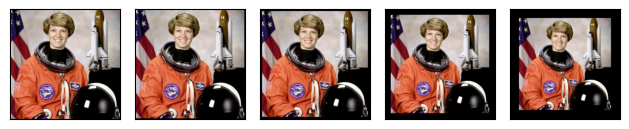

In [2]:
padded_imgs = [v2.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot([orig_img] + padded_imgs)

### 调整大小

{class}`~torchvision.transforms.v2.Resize` 转换（也请参见 {func}`~torchvision.transforms.v2.functional.resize`）用于调整图像的大小。

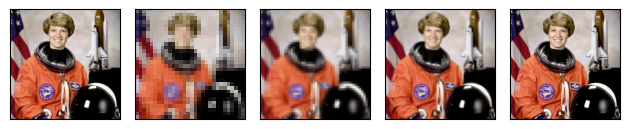

In [3]:
resized_imgs = [v2.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot([orig_img] + resized_imgs)

### CenterCrop

{class}`~torchvision.transforms.v2.CenterCrop` 转换（另见 :{func}`~torchvision.transforms.v2.functional.center_crop`）在图像中心进行裁剪。

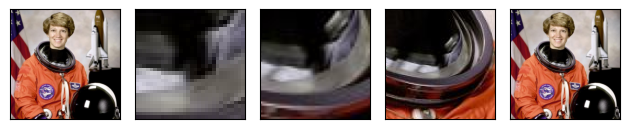

In [4]:
center_crops = [v2.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot([orig_img] + center_crops)

### FiveCrop

{class}`~torchvision.transforms.v2.FiveCrop` 变换（也参见 {func}`~torchvision.transforms.v2.functional.five_crop`）将给定的图像裁剪为四个角和中心的五个部分。

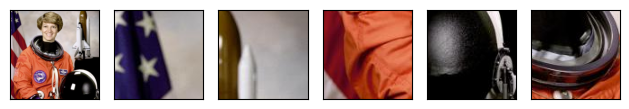

In [5]:
(top_left, top_right, bottom_left, bottom_right, center) = v2.FiveCrop(size=(100, 100))(orig_img)
plot([orig_img] + [top_left, top_right, bottom_left, bottom_right, center])

### 随机透视变换

{class}`~torchvision.transforms.v2.RandomPerspective` 变换（也请参见 {func}`~torchvision.transforms.v2.functional.perspective`）
对图像执行随机透视变换。

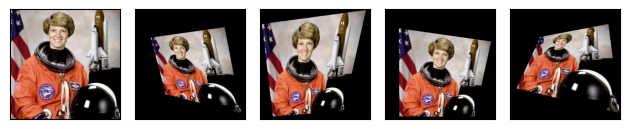

In [6]:
perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot([orig_img] + perspective_imgs)

### 随机旋转

{class}`~torchvision.transforms.v2.RandomRotation` 变换（另见 {func}`~torchvision.transforms.v2.functional.rotate` 函数）以随机角度旋转图像。

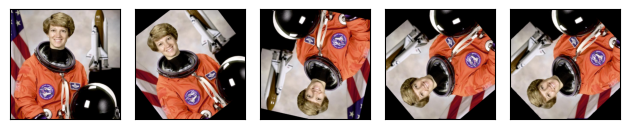

In [7]:
rotater = v2.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot([orig_img] + rotated_imgs)

### 随机仿射

{class}`~torchvision.transforms.v2.RandomAffine`转换
（另见：{func}`~torchvision.transforms.v2.functional.affine`）
对图像执行随机仿射变换。

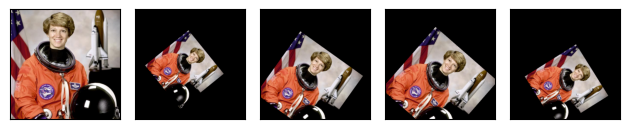

In [8]:
affine_transfomer = v2.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)

### 弹性变换

{class}`~torchvision.transforms.v2.ElasticTransform` 转换（也参见 {func}`~torchvision.transforms.v2.functional.elastic_transform` 函数）随机改变图像中物体的形态，并产生类似透视水面的效果。

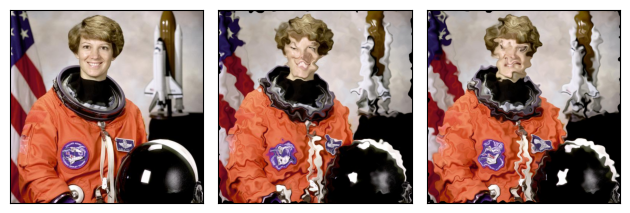

In [9]:
elastic_transformer = v2.ElasticTransform(alpha=250.0)
transformed_imgs = [elastic_transformer(orig_img) for _ in range(2)]
plot([orig_img] + transformed_imgs)

### 随机裁剪

{class}`torchvision.transforms.v2.RandomCrop` 变换（也请参见 {func}`torchvision.transforms.v2.functional.crop` 函数）可以在图像的随机位置执行裁剪操作。

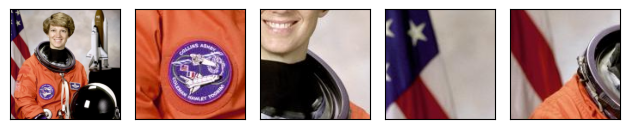

In [10]:
cropper = v2.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot([orig_img] + crops)

### 随机调整大小裁剪

{class}`~torchvision.transforms.v2.RandomResizedCrop` 变换（也请参考 {func}`~torchvision.transforms.v2.functional.resized_crop`函数）在图像的随机位置进行裁剪，然后将裁剪的部分调整到指定的大小。

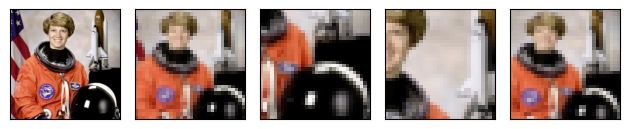

In [11]:
resize_cropper = v2.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot([orig_img] + resized_crops)

## 光度变换

光度图像变换(Photometric Transforms)指的是修改图像的光度属性的过程，例如其亮度、对比度、颜色或色调。这些变换被用来改变图像的视觉外观，同时保持其几何结构不变。

除了 {class}`~torchvision.transforms.v2.Grayscale` 之外，以下变换是随机的，这意味着相同的变换实例每次对给定图像进行变换时都会产生不同的结果。

### Grayscale（灰度）

{class}`~torchvision.transforms.v2.Grayscale` 变换（另见 {func}`~torchvision.transforms.v2.functional.to_grayscale`）将图像转换为灰度图。

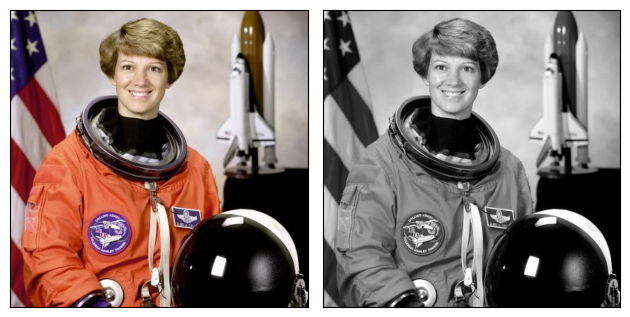

In [12]:
gray_img = v2.Grayscale()(orig_img)
plot([orig_img, gray_img], cmap='gray')

### ColorJitter

{class}`~torchvision.transforms.v2.ColorJitter` 转换随机改变图像的亮度、对比度、饱和度、色调等属性。

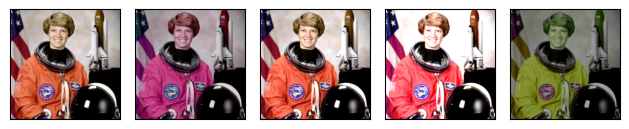

In [13]:
jitter = v2.ColorJitter(brightness=.5, hue=.3)
jittered_imgs = [jitter(orig_img) for _ in range(4)]
plot([orig_img] + jittered_imgs)

### 高斯模糊

{class}`~torchvision.transforms.v2.GaussianBlur`变换（也可参见函数 {func}`~torchvision.transforms.v2.functional.gaussian_blur`）对图像执行高斯模糊变换。

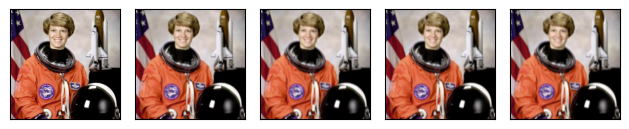

In [14]:
blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot([orig_img] + blurred_imgs)

### 随机反转颜色

{class}`~torchvision.transforms.v2.RandomInvert` 变换（也见 {func}`~torchvision.transforms.v2.functional.invert` 函数）随机反转给定图像的颜色。

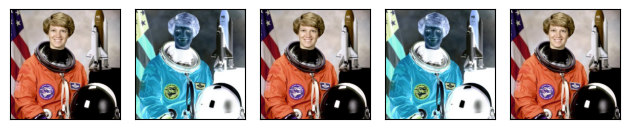

In [15]:
inverter = v2.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot([orig_img] + invertered_imgs)

### 随机海报化

{class}`~torchvision.transforms.v2.RandomPosterize` 转换（也请参见 {func}`torchvision.transforms.v2.functional.posterize` 函数）通过减少每个颜色通道的位数，对图像进行随机海报化处理。

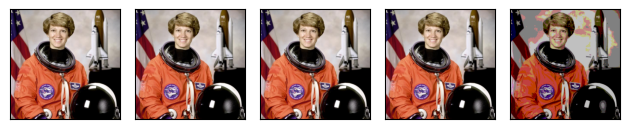

In [16]:
posterizer = v2.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
plot([orig_img] + posterized_imgs)

### 随机曝光

{class}`~torchvision.transforms.v2.RandomSolarize`变换
（也见 {func}`~torchvision.transforms.v2.functional.solarize`函数）
通过反转所有高于阈值的像素值，随机地对图像进行太阳化处理。

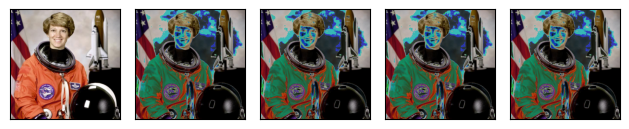

In [17]:
solarizer = v2.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot([orig_img] + solarized_imgs)

### 随机调整锐度

{class}`~torchvision.transforms.v2.RandomAdjustSharpness` 转换（也可参见 {func}`~torchvision.transforms.v2.functional.adjust_sharpness`）随机调整给定图像的锐度。

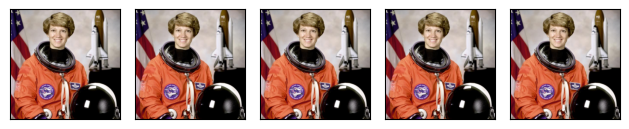

In [18]:
sharpness_adjuster = v2.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
plot([orig_img] + sharpened_imgs)

### 随机自动对比度

{class}`~torchvision.transforms.v2.RandomAutocontrast` 转换器
（另见 {func}`~torchvision.transforms.v2.functional.autocontrast`）
随机对给定图像应用自动对比度调整。

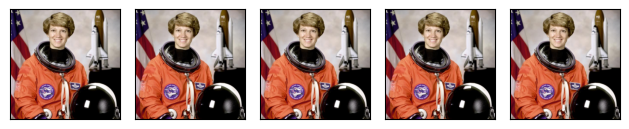

In [19]:
autocontraster = v2.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot([orig_img] + autocontrasted_imgs)

### 随机均衡化

{class}`~torchvision.transforms.v2.RandomEqualize` 变换（也见 {func}`~torchvision.transforms.v2.functional.equalize`）随机对给定图像的直方图进行均衡化处理。

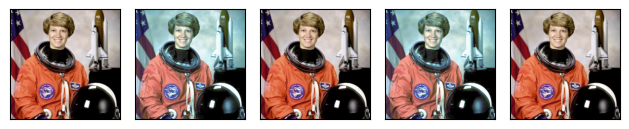

In [20]:
equalizer = v2.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot([orig_img] + equalized_imgs)

### JPEG

{class}`~torchvision.transforms.v2.JPEG`变换（也可参见 {func}`~torchvision.transforms.v2.functional.jpeg` 函数）对给定的图像应用随机程度的JPEG压缩。

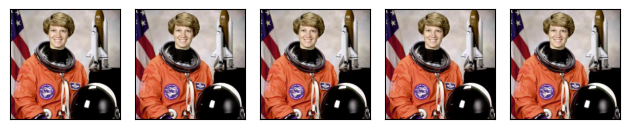

In [21]:
jpeg = v2.JPEG((5, 50))
jpeg_imgs = [jpeg(orig_img) for _ in range(4)]
plot([orig_img] + jpeg_imgs)

## 增强变换

以下转换是多种变换的组合，包括几何变换、光度变换或两者兼有。

### 自动增强

{class}`~torchvision.transforms.v2.AutoAugment` 类根据给定的自动增强策略自动对数据进行增强。有关可用策略的详细信息，请参见 {class}`~torchvision.transforms.v2.AutoAugmentPolicy`。

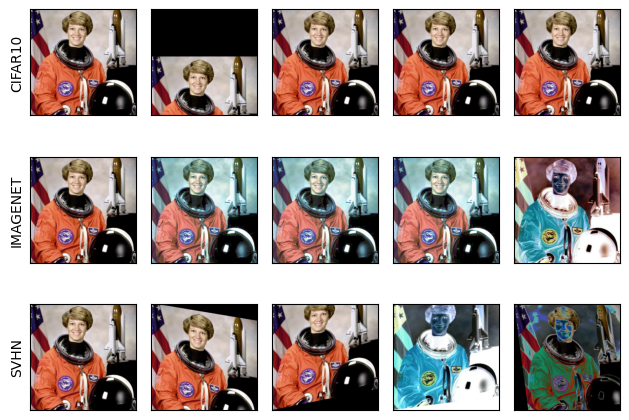

In [22]:
policies = [v2.AutoAugmentPolicy.CIFAR10, v2.AutoAugmentPolicy.IMAGENET, v2.AutoAugmentPolicy.SVHN]
augmenters = [v2.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot([[orig_img] + row for row in imgs], row_title=row_title)

### RandAugment

{class}`~·~torchvision.transforms.v2.RandAugment` 是 AutoAugment 的替代版本。

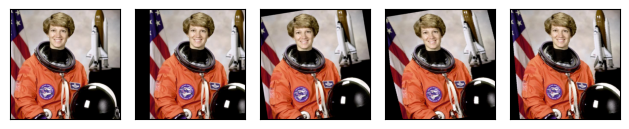

In [23]:
augmenter = v2.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot([orig_img] + imgs)

### TrivialAugmentWide

{class}`~torchvision.transforms.v2.TrivialAugmentWide` 是 AutoAugment 的一种替代实现。然而，与多次变换图像不同，它仅使用给定列表中的随机变换和随机强度数对图像进行一次转换。

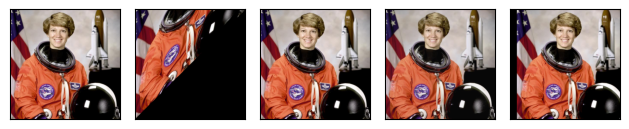

In [24]:
augmenter = v2.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot([orig_img] + imgs)

### AugMix

{class}`~torchvision.transforms.v2.AugMix` 转换器在图像的增强版本之间进行插值。

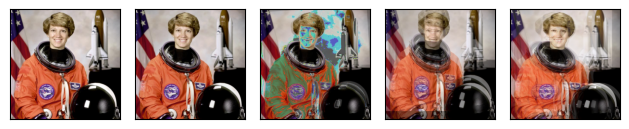

In [25]:
augmenter = v2.AugMix()
imgs = [augmenter(orig_img) for _ in range(4)]
plot([orig_img] + imgs)

## 随机应用变换

给定概率 `p`，以下变换将随机应用。也就是说，当 `p = 0.5` 时，有 $50\%$ 的机会返回原始图像，也有50%的机会返回变换后的图像，即使是使用同一个变换实例调用也是如此！

### 随机水平翻转

{class}`~torchvision.transforms.v2.RandomHorizontalFlip` 变换
(另见 {func}`~torchvision.transforms.v2.functional.hflip`)
以给定的概率对图像进行水平翻转。

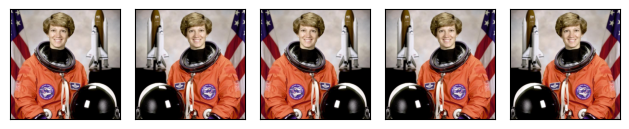

In [26]:
hflipper = v2.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot([orig_img] + transformed_imgs)

### 随机垂直翻转

{class}`~torchvision.transforms.v2.RandomVerticalFlip` 转换（另见 {func}`~torchvision.transforms.v2.functional.vflip` 函数）对图像执行垂直翻转，该操作基于给定的概率进行。

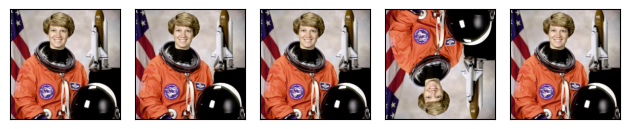

In [27]:
vflipper = v2.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
plot([orig_img] + transformed_imgs)

### 随机应用

{class}`~torchvision.transforms.v2.RandomApply` 变换器随机地以给定的概率应用一系列变换。

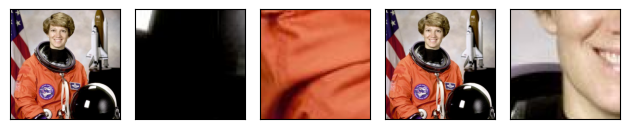

In [28]:
applier = v2.RandomApply(transforms=[v2.RandomCrop(size=(64, 64))], p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot([orig_img] + transformed_imgs)